# Pytorch  Framework for Multi-class Text Classification

## Sentiment Classification - 3 Class Problem

* Financial Phrasebank Dataset <br/>

    * 0 - Positive <br/>
    * 1 - Negative <br/>
    * 2 - Neutral  <br/>

## Reading Data

In [1]:
import sys
import numpy as np
import pandas as pd

sys.path.append("..")
pd.set_option('display.max_colwidth', -1)

In [2]:
df_train = pd.read_csv('../datasets/financial_phrasebank/training.csv', sep='\t')
df_test = pd.read_csv('../datasets/financial_phrasebank/testing.csv', sep='\t')
df_val = pd.read_csv('../datasets/financial_phrasebank/validation.csv', sep='\t')

df_train.shape, df_test.shape, df_val.shape

((3100, 3), (970, 3), (776, 3))

In [3]:
df_train.label.value_counts()

neutral     1821
positive    892 
negative    387 
Name: label, dtype: int64

In [4]:
df_val.label.value_counts()

neutral     475
positive    208
negative    93 
Name: label, dtype: int64

## Processing Data in Input format

In [5]:
data_classes = ['positive', 'negative', 'neutral']

df_train['label'] = df_train['label'].apply(data_classes.index)
df_test['label'] = df_test['label'].apply(data_classes.index)
df_val['label'] = df_val['label'].apply(data_classes.index)

In [6]:
df_test.head()

,Unnamed: 0,text,label
0,178,"comparable operating profit totaled EUR 854mn , up from EUR 730mn in 2004 .",0
1,4157,Finnish M-real 's Kyro mill is starting negotiations to cut staff .,1
2,3616,"In 2007 , the Group 's net sales stood at EUR 42 million and it had about 1,445 employees .",2
3,194,"Finnish lifting equipment maker Konecranes Oyj said on July 30 , 2008 that its net profit rose to 71.2 mln euro ( $ 111.1 mln ) for the first half of 2008 from 57.1 mln euro ( $ 89.1 mln ) for the same period of 2007 .",0
4,1584,"Pulkovo park will be ready in 2016 , its first stage of 23,000 sq. m. will be finished in the first quarter of 2010 .",2


In [7]:
df_bert_train = pd.DataFrame({'id':df_train['Unnamed: 0'],
            'text':df_train['text'],
            'label':df_train['label']})

df_bert_test = pd.DataFrame({'id':df_test['Unnamed: 0'],
            'text':df_test['text']})

df_bert_val = pd.DataFrame({'id':df_val['Unnamed: 0'],
            'text':df_val['text'],
            'label':df_val['label']})

In [8]:
df_bert_train.to_csv('../datasets/financial_phrasebank/train.csv',index=False)
df_bert_test.to_csv('../datasets/financial_phrasebank/test.csv',index=False)
df_bert_val.to_csv('../datasets/financial_phrasebank/dev.csv',index=False)

## Training Transformers (Albert | Roberta | DistilBert) classifier with FrameWork

In [9]:
from classitransformers.report import metrics
from classitransformers.configs import Configs
from classitransformers.pytransformers import TransformersClassification

## Set Configurations

* Pre-trained config filepath, vocab filepath and model checkpoint filepath
* labels list
* train, test and eval batch size
* max_seq_len - how long is the each text input sentence !!
* data_dir - data path folder (optional)
* output_dir - output path folder (optional)

In [10]:
config = Configs(
                pretrained_model_dir = '../models/DistilBert',
                model_name = 'distilbert',
                num_train_epochs=3,
                train_batch_size = 16,
                eval_batch_size = 8, 
                do_train = True, 
                do_eval = True, 
                max_seq_length = 64,
                label_list = ["0", "1", "2"],
                data_dir = '../datasets/financial_phrasebank/',
                output_dir = '../transformers_output_sentiment/')

In [11]:
model = TransformersClassification(config)

## Train Method

In [12]:
model.train()


======== Epoch 1 / 3 ========
Training...
  Batch    40  of    194.    Elapsed: 0:00:08.
  Batch    80  of    194.    Elapsed: 0:00:15.
  Batch   120  of    194.    Elapsed: 0:00:23.
  Batch   160  of    194.    Elapsed: 0:00:31.

  Average training loss: 0.64
  Training epcoh took: 0:00:37

Running Validation...
  Accuracy: 0.83
  Validation Loss: 0.00
  Validation took: 0:00:03

======== Epoch 2 / 3 ========
Training...
  Batch    40  of    194.    Elapsed: 0:00:08.
  Batch    80  of    194.    Elapsed: 0:00:15.
  Batch   120  of    194.    Elapsed: 0:00:23.
  Batch   160  of    194.    Elapsed: 0:00:31.

  Average training loss: 0.28
  Training epcoh took: 0:00:37

Running Validation...
  Accuracy: 0.85
  Validation Loss: 0.00
  Validation took: 0:00:03

======== Epoch 3 / 3 ========
Training...
  Batch    40  of    194.    Elapsed: 0:00:08.
  Batch    80  of    194.    Elapsed: 0:00:15.
  Batch   120  of    194.    Elapsed: 0:00:23.
  Batch   160  of    194.    Elapsed: 0:00:31.



## Model Test

In [13]:
prediction = model.test()

**Testing a sentence, takes a list of sentences.**

In [14]:
model.text_inference(['Trading gives the best returns among all the options of investemnts'])

[array([0.9197695 , 0.07576627, 0.48963723], dtype=float32)]

In [15]:
y_pred = [np.argmax(tup) for tup in prediction]
y = df_test.label

## Accuracy and Report



Accuracy: 0.866
Precision: 0.845
Recall: 0.838
F1-Score: 0.842


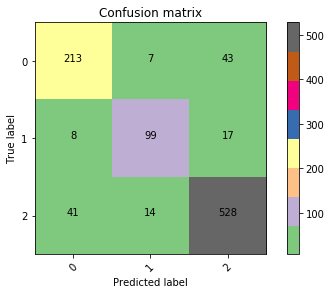

In [16]:
metrics(y, y_pred)